In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
#load chip data
data = pd.read_csv('data/chip_test.csv')

#check data
print(data.head())
print(data.shape)

      test1    test2  pass
0  0.051267  0.69956     1
1 -0.092742  0.68494     1
2 -0.213710  0.69225     1
3 -0.375000  0.50219     1
4  0.183760  0.93348     0
(118, 3)


In [3]:
#add label mask
mask = data.loc[:,'pass'] == 1
mask.head()

0     True
1     True
2     True
3     True
4    False
Name: pass, dtype: bool

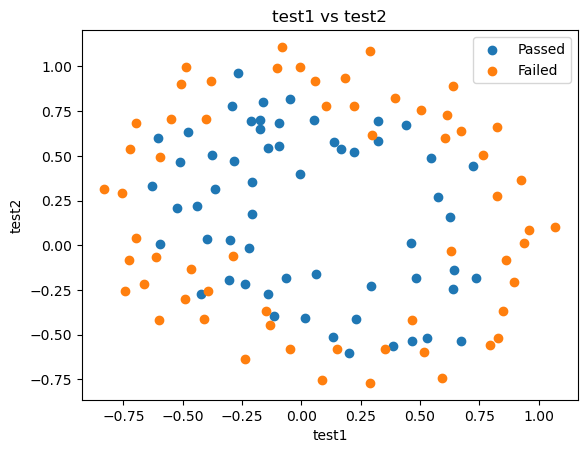

In [4]:
fig2 = plt.figure()
passed=plt.scatter(data.loc[:,'test1'][mask],data.loc[:,'test2'][mask])
failed=plt.scatter(data.loc[:,'test1'][~mask],data.loc[:,'test2'][~mask])
plt.title('test1 vs test2')
plt.xlabel('test1')
plt.ylabel('test2')
plt.legend((passed,failed),('Passed','Failed'))
plt.show()

In [5]:
X = data.drop(['pass'],axis=1)
y = data.loc[:,'pass']
X1 = data.loc[:,'test1']
X2 = data.loc[:,'test2']
y.head()
X1_2=X1*X1
X2_2=X2*X2
X1_X2=X1*X2
X_new = {'X1':X1,'X2':X2,'X1_2':X1_2,'X2_2':X2_2,'X1_X2':X1_X2}
X_new = pd.DataFrame(X_new)
print(X_new)

           X1        X2      X1_2      X2_2     X1_X2
0    0.051267  0.699560  0.002628  0.489384  0.035864
1   -0.092742  0.684940  0.008601  0.469143 -0.063523
2   -0.213710  0.692250  0.045672  0.479210 -0.147941
3   -0.375000  0.502190  0.140625  0.252195 -0.188321
4    0.183760  0.933480  0.033768  0.871385  0.171536
..        ...       ...       ...       ...       ...
113 -0.720620  0.538740  0.519293  0.290241 -0.388227
114 -0.593890  0.494880  0.352705  0.244906 -0.293904
115 -0.484450  0.999270  0.234692  0.998541 -0.484096
116 -0.006336  0.999270  0.000040  0.998541 -0.006332
117  0.632650 -0.030612  0.400246  0.000937 -0.019367

[118 rows x 5 columns]


In [6]:
#establish new model with new data
from sklearn.linear_model import LogisticRegression
LR2 = LogisticRegression()
LR2.fit(X_new, y)

LogisticRegression()

In [7]:
from sklearn.metrics import accuracy_score
y2_predict=LR2.predict(X_new)
accuracy = accuracy_score(y, y2_predict)
print("Accuracy:", accuracy)

Accuracy: 0.8135593220338984


[1.19949075] 0.3500680419410172 0.6715136404585058 -2.781630065835506 -2.3904295834119345 -0.9569168535701701
112   NaN
86    NaN
84    NaN
111   NaN
113   NaN
       ..
70    NaN
65    NaN
68    NaN
67    NaN
101   NaN
Name: test1, Length: 118, dtype: float64


c:\ProgramData\anaconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


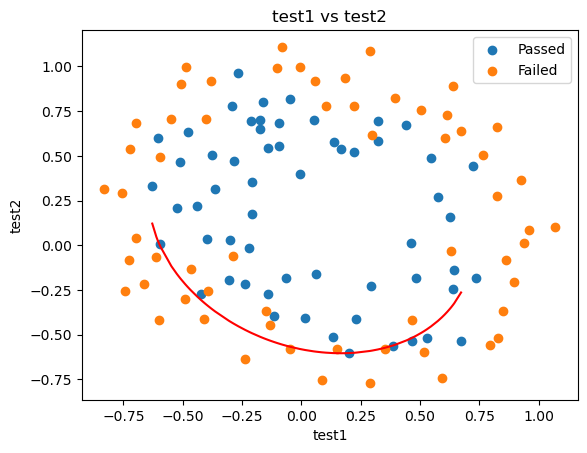

In [8]:
t0 = LR2.intercept_
t1,t2,t3,t4,t5 = LR2.coef_[0][0],LR2.coef_[0][1],LR2.coef_[0][2],LR2.coef_[0][3],LR2.coef_[0][4]
print(t0,t1,t2,t3,t4,t5)

X1_new = X1.sort_values()

a=t4
b=t5*X1_new+t2
c=t0+t1*X1_new+t3*X1_new*X1_new

X2_new_boundary = (-b+np.sqrt(b*b-4*a*c))/(2*a)
print(X2_new_boundary)

fig5 = plt.figure()
passed=plt.scatter(data.loc[:,'test1'][mask],data.loc[:,'test2'][mask])
failed=plt.scatter(data.loc[:,'test1'][~mask],data.loc[:,'test2'][~mask])
plt.title('test1 vs test2')
plt.xlabel('test1')
plt.ylabel('test2')
plt.legend((passed,failed),('Passed','Failed'))
plt.plot(X1_new,X2_new_boundary,color='red',label='Decision Boundary')
plt.show()

In [9]:
def f(x,t0,t1,t2,t3,t4,t5):
    a=t4
    b=t5*X1_new+t2
    c=t0+t1*X1_new+t3*X1_new*X1_new

    X2_new_boundary1 = (-b+np.sqrt(b*b-4*a*c))/(2*a)
    X2_new_boundary2 = (-b-np.sqrt(b*b-4*a*c))/(2*a)
    
    return X2_new_boundary1,X2_new_boundary2

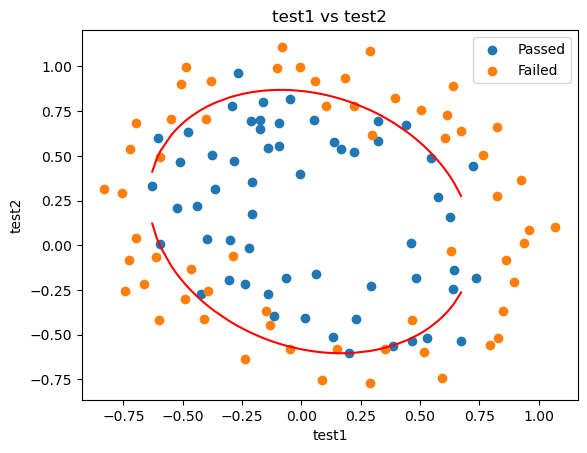

In [10]:
X2_new_boundary1,X2_new_boundary2 = f(X1_new,t0,t1,t2,t3,t4,t5)
fig5 = plt.figure()
passed=plt.scatter(data.loc[:,'test1'][mask],data.loc[:,'test2'][mask])
failed=plt.scatter(data.loc[:,'test1'][~mask],data.loc[:,'test2'][~mask])
plt.title('test1 vs test2')
plt.xlabel('test1')
plt.ylabel('test2')
plt.legend((passed,failed),('Passed','Failed'))
plt.plot(X1_new,X2_new_boundary1,color='red',label='Decision Boundary')
plt.plot(X1_new,X2_new_boundary2,color='red',label='Decision Boundary')
plt.show()
